In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import string

In [2]:
data = pd.read_csv(r'C:\Users\Mhd Naqeeb\Downloads\Myntra-Kurtis\Myntra Kurtis\Myntra kurtis.csv')

In [3]:
print(data.isnull().sum())

Brand Name             0
Product URL            0
Image                467
Product Ratings      198
Number of ratings      0
Product Info           0
Selling Price         74
Price                 74
Discount              74
dtype: int64


In [4]:
data = data.drop("Image",axis=1)

In [5]:
data = data.dropna()

In [6]:
print(data.shape)

(364, 8)


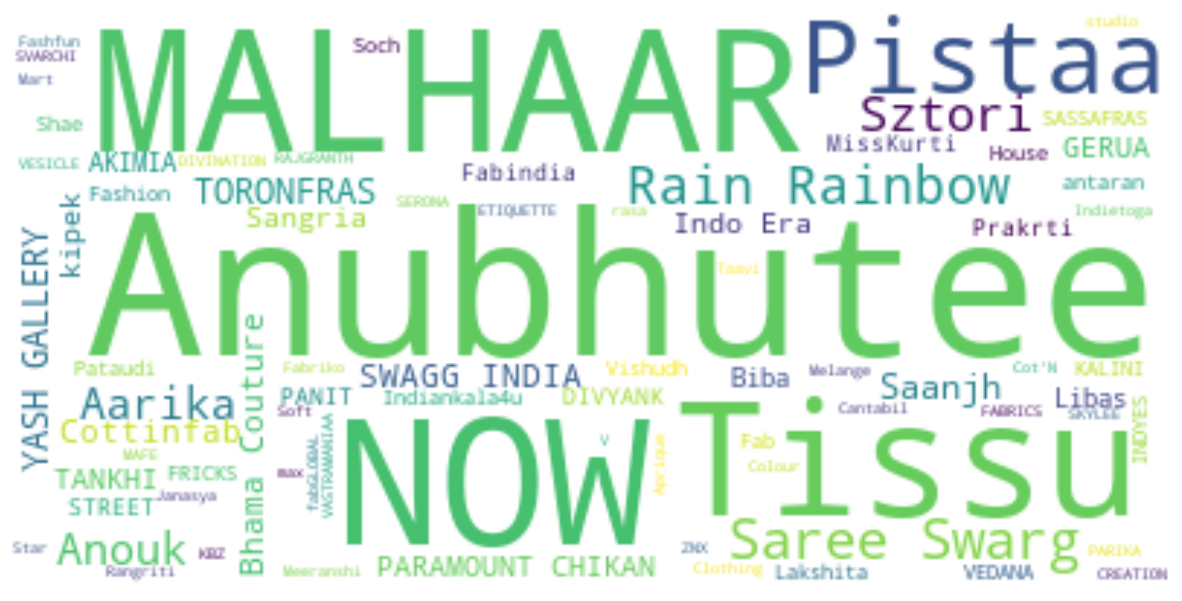

In [7]:
text = " ".join(i for i in data["Brand Name"])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
highest_rated = data.sort_values(by=["Product Ratings"], 
                                 ascending=False)
highest_rated = highest_rated.head(10)
print(highest_rated[['Product Info', "Product Ratings", "Brand Name"]])

                        Product Info  Product Ratings        Brand Name
435            Mandarin Collar Kurti              5.0            INDYES
249      Floral Printed Kaftan Kurta              5.0           Sangria
448          Solid Pure Cotton Kurti              5.0           MALHAAR
308             Floral Printed Kurti              5.0           MALHAAR
538                Pure Cotton Kurti              5.0           MALHAAR
277    Women Solid Embellished Kurti              5.0          Fabindia
515     Chikankari Embroidered Kurti              5.0  PARAMOUNT CHIKAN
62       Ethnic Motifs Printed Kurti              4.9              Biba
80   Ethnic Motifs Embroidered Kurti              4.8           Sangria
450      Self Striped Straight Kurti              4.8            Saanjh


##
Recommending Fashion Products

mean rating (mr): the mean rating of all the products
minimum ratings (m): minimum number of ratings
number of ratings (n): total number of ratings of the product
average ratings (a): average rating of the product

In [9]:
mr = data['Product Ratings'].mean()
m = data['Number of ratings'].quantile(0.9)
n = data['Number of ratings']
a = data['Product Ratings']
data["Score"]  = (n/(n+m) * a) + (m/(m+n) * mr)

recommendations = data.sort_values('Score', ascending=False)
print(recommendations[['Brand Name', 'Product Info',
                       'Product Ratings', 'Score', 
                       'Selling Price', 'Discount']].head(10))

         Brand Name                                       Product Info   
48            Tissu                    Women Floral Print A-Line Kurti  \
11        Anubhutee                        Ethnic Motifs Printed Kurti   
155       Anubhutee                                Women Printed Kurti   
66     YASH GALLERY                               Printed A-Line Kurti   
27        Anubhutee                       Women Printed Straight Kurti   
102          AKIMIA                      Embroidered Pure Cotton Kurti   
88            Tissu                Women Floral Printed Straight Kurti   
3         Anubhutee                        Ethnic Motifs Printed Kurti   
42   Rain & Rainbow  Women Printed Pure Cotton Pure Cotton A-Line K...   
18            GERUA                        Ethnic Motifs Printed Kurti   

     Product Ratings     Score  Selling Price   Discount  
48               4.4  4.338320          549.0  (45% OFF)  
11               4.4  4.300868          521.0  (70% OFF)  
155     

So this is how i can create a fashion recommendation system using Python.